# DATS 6103 - Individual Project 3 - Alumni Engagement Score

By: Elise Roberts

## Preliminary Research

The Alumni Engagement Score is used by higher education institutions to measure the engagement of their alumni base. Industry standards for how such a score should be calculated were established by the Council of Advancement and Support of Education (CASE) in 2018. The CASE White Paper on Alumni Metrics and can be found [here.](https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf)

CASE defines 'alumni engagement' as "activities that are valued by alumni, build enduring and mutually beneficial relationships, inspire loyalty and financial support, strengthen the institution's reputation and involve alumni in meaningful activities to advance the institution's mission. [$^{1}$](https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf) CASE recommends that the Alumni Engagement Score be broken down into four subscores: Volunteer, Experiential, Philanthropic, and Communication. These categories are defined by CASE as follows: 

- #### Volunteer: 
"Formally defined and rewarding volunteer roles that are endorsed or valued by the institution and support its mission and strategic goals." [$^{2}$](https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf)

- #### Experiential: 
"Meaningful experiences that inspire alumni, are valued by the institution, promote its mission, celebrate its achievements and strengthen its reputation." [$^{3}$](https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf)

- #### Philanthropic:
"Diverse opportunities for alumni to make philanthropic investments that are meaningful to the donor and support the institution’s mission and strategic goals." [$^{4}$](https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf)

- #### Communication:
"Interactive, meaningful and informative communication with alumni that supports the institution’s mission, strategic goals and reputation." [$^{5}$](https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf)

## How the Score is Calculated at GW

Following the guidance provided by CASE [$^{6}$](https://www.case.org/system/files/media/inline/AEM%20Guidance%20Doc%20v13%20FINAL%20.pdf), The George Washington University created it's own Alumni Engagement Score in 2019 after five years of research, planning, and preparation. The Score is built to be as broad reaching as possible, while at the same time being specific, meaningful, measurable, understandable, and impactful. Each alum is given a Score on a scale of 0-100 and at GW, we define an 'engaged' alum as one that has a Score greater than zero. Overall, the Scores is a simple sum of how each alum scores in each of the four subscores: Volunteer, Experiential, Philanthropic, and Communication. 

#### Volunteer Calculation (Total Calculable Score: 30) : 
- Current Member of a Board or Council (10 points)
- Other Current Volunteer Activity on record (up to 10 points)
- Past Volunteer Activity on record (up to 5 points)
- Past Member of a School Board or Council (5 points)

#### Experiential Calculation (Total Calculable Score: 30): 
- Event Attendance (up to 10 points)
- Lifelong Learning/Career Services (up to 10 points)
- Access Online Services (2.5 points)
- Recevied an Award from GW (2.5 points)
- Visit Contact Report (5 points)

#### Philanthropic Calculation (Total Calculable Score: 20): 
- Loyal Giving (2.5 points)
- Giving \\$1,000 - \\$49,999 (5 points)
- Current FY Donor or LYBUNT (2.5 points)
- Years Increasing Gift Amount (5 points)
- Leadership Giving of \\$100,000 or more (2.5 points)
- Planned Giving (2.5 points)

#### Communication Calculation (Total Calculable Score: 15): 
- Social Media Advocacy - Facebook Engagement (up to 10 points)
- Contact Report (up to 5 points)

While the total calculable score in FY21 is just 95 possible points, the Alumni Engagement Score Project Working Group is actively working to improve the score. This fiscal year, we are working to build an additional measure for the communication subscore of up to 5 points to make the total calculable score 100. Currently, we are building the infrastructure tp measure this data point in our donor database so that we can use it in FY22. 

## Importing Libraries

In [379]:
#import libraries

import pandas as pd
import numpy as nm
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as grd
import scipy.stats
import re
from os import path
from PIL import Image
import plotly.express as px

## Calculations at GW

So far, the score has been calculated at GW for each living alumnus in our donor database, Ellucian Advance, on three occasions. Each calculation is run capturing data from the following calendar year on the following dates:

- FY19 calculation on 7.1.2019
- FY20 calculation on 7.1.2020
- FY21 calculation on 10.1.2020

## Reading in the Data

Data for this project includes all three Alumni Engagement Scores and their four subscores, as well as additional demographic information. 

In [380]:
#reading in the datasets

fy19 = pd.read_csv("FY19 AES.csv")

fy20 = pd.read_csv("FY20 AES.csv")

fy21 = pd.read_csv("FY21 AES.csv")

In [381]:
fy19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307970 entries, 0 to 307969
Data columns (total 6 columns):
ID                               307970 non-null int64
Philanthropic_subtotal           307970 non-null float64
Volunteer_subtotal               307970 non-null float64
Experiential_subtotal            307970 non-null float64
Communication_subtotal           307970 non-null int64
Final_Alumni_Engagement_Score    307970 non-null float64
dtypes: float64(4), int64(2)
memory usage: 14.1 MB


In [382]:
fy20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307149 entries, 0 to 307148
Data columns (total 6 columns):
ID                               307149 non-null int64
Philanthropic_subtotal           307149 non-null float64
Volunteer_subtotal               307149 non-null float64
Experiential_subtotal            307149 non-null float64
Communication_subtotal           307149 non-null float64
Final_Alumni_Engagement_Score    307149 non-null float64
dtypes: float64(5), int64(1)
memory usage: 14.1 MB


In [383]:
fy21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298838 entries, 0 to 298837
Data columns (total 29 columns):
ID                          298838 non-null int64
Pref Class Year             298806 non-null float64
Pref School Code            298834 non-null object
Pref State                  253163 non-null object
Pref Country                10660 non-null object
School1                     294108 non-null object
Class1                      291976 non-null float64
School2                     31557 non-null object
Class2                      31561 non-null float64
School3                     2744 non-null object
Class3                      2746 non-null float64
School4                     193 non-null object
Class4                      194 non-null float64
Confirmed Rating            25756 non-null object
Research Qualification      298838 non-null object
Research Rating             298838 non-null object
Engagement Overall          298838 non-null float64
Engagement Philanthropic    298

## Rename Columns

In [384]:
#rename columns for FY19 dataset
fy19.rename(columns={'Philanthropic_subtotal': 'fy19_phil', 
                    'Volunteer_subtotal': 'fy19_vol',
                    'Experiential_subtotal': 'fy19_exp',
                    'Communication_subtotal': 'fy19_com',
                    'Final_Alumni_Engagement_Score': 'fy19_aes'}, inplace=True)
print(fy19.columns)

Index(['ID', 'fy19_phil', 'fy19_vol', 'fy19_exp', 'fy19_com', 'fy19_aes'], dtype='object')


In [385]:
#rename columns for FY20 dataset
fy20.rename(columns={'Philanthropic_subtotal': 'fy20_phil', 
                    'Volunteer_subtotal': 'fy20_vol',
                    'Experiential_subtotal': 'fy20_exp',
                    'Communication_subtotal': 'fy20_com',
                    'Final_Alumni_Engagement_Score': 'fy20_aes'}, inplace=True)
print(fy20.columns)

Index(['ID', 'fy20_phil', 'fy20_vol', 'fy20_exp', 'fy20_com', 'fy20_aes'], dtype='object')


In [386]:
#rename columns for FY21 dataset
fy21.rename(columns={'Engagement Philanthropic': 'fy21_phil', 
                    'Engagement Volunteer': 'fy21_vol',
                    'Engagement Experiential': 'fy21_exp',
                    'Engagement Communication': 'fy21_com',
                    'Engagement Overall': 'fy21_aes'}, inplace=True)
print(fy21.columns)

Index(['ID', 'Pref Class Year', 'Pref School Code', 'Pref State',
       'Pref Country', 'School1', 'Class1', 'School2', 'Class2', 'School3',
       'Class3', 'School4', 'Class4', 'Confirmed Rating',
       'Research Qualification', 'Research Rating', 'fy21_aes', 'fy21_phil',
       'fy21_vol', 'fy21_exp', 'fy21_com', 'Lifetime Commitments', 'Sport1',
       'Sport2', 'Sport3', 'Student Activity1', 'Student Activity2',
       'Student Activity3', 'Student Activity4'],
      dtype='object')


## Merge Data Together

In [387]:
#merge dataframes together
first_merge = pd.merge(fy19, fy20, on = ['ID'], how = 'inner')
first_merge.head()

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,fy20_aes
0,100001,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100004,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100005,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
#final merge
data = pd.merge(first_merge, fy21, on = ['ID'], how = 'inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296872 entries, 0 to 296871
Data columns (total 39 columns):
ID                        296872 non-null int64
fy19_phil                 296872 non-null float64
fy19_vol                  296872 non-null float64
fy19_exp                  296872 non-null float64
fy19_com                  296872 non-null int64
fy19_aes                  296872 non-null float64
fy20_phil                 296872 non-null float64
fy20_vol                  296872 non-null float64
fy20_exp                  296872 non-null float64
fy20_com                  296872 non-null float64
fy20_aes                  296872 non-null float64
Pref Class Year           296840 non-null float64
Pref School Code          296868 non-null object
Pref State                251359 non-null object
Pref Country              10560 non-null object
School1                   292149 non-null object
Class1                    290015 non-null float64
School2                   31461 non-null object


### Replacing NaN's with an Empty String

In [389]:
#convert NaN's to empty strings
data = data.replace(nm.nan, '', regex=True)
data.head()

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,...,fy21_exp,fy21_com,Lifetime Commitments,Sport1,Sport2,Sport3,Student Activity1,Student Activity2,Student Activity3,Student Activity4
0,100001,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,,,,,,,,
1,100002,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,50,,,,,,,
2,100003,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,,,,,,,,
3,100004,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,,,,,,,,
4,100005,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,275,,,,,,,


# Analysis

Following to CASE's recommended guidelines for analysis [$^{7}$](https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf), I'll begin by looking at the means, medians, and modes of each year's calculation, focusing on alumni who are engaged in at least one of the four subscores.[$^{8}$](https://www.case.org/system/files/media/file/CASE%20Alumni%20Engagement%20Metrics%20Year%201_0.pdf) This fiscal year, GW established a goal to increase the average Alumni Engagement Score overall as well as the average Score for each school. Therefore, I will focus a majority of my analysis on averages. Additionally, I'll examine the proportion of alumni who are "engaged", as defined as having a score greater than zero. Next, I'll examine whether specific cohorts of alumni are more engaged on average than all alumni. I'll end my analysis for this project with a map of where the most engaged alumni live as well as examine the correlations between the subscores. 

## Analysis of FY19 AES Calculation

In [390]:
#calculating the mean of the FY19 AES
mn19 = data['fy19_aes'].mean()
print(mn19)

1.3827171306152146


In [391]:
#median of FY19 AES
mdn19 = data['fy19_aes'].median()
print(mdn19)

0.0


In [392]:
#mode of FY19 AES
mde19 = data['fy19_aes'].mode()
print(mde19)

0    0.0
dtype: float64


In [393]:
#subset data to just engaged alumni 
engaged19 = data[data['fy19_aes'] != 0]
engaged19.head()

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,...,fy21_exp,fy21_com,Lifetime Commitments,Sport1,Sport2,Sport3,Student Activity1,Student Activity2,Student Activity3,Student Activity4
18,100020,2.5,0.0,0.0,0,2.5,2.5,0.0,0.0,2.5,...,0.0,2.5,880,,,,,,,
48,100051,0.0,0.0,0.0,5,5.0,0.0,0.0,0.0,0.0,...,0.0,5.0,,,,,,,,
57,100060,0.0,0.0,2.5,0,2.5,0.0,0.0,0.0,0.0,...,0.0,0.0,,,,,,,,
62,100065,0.0,0.0,0.0,5,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,,,,,,,,
71,100074,0.0,0.0,2.5,0,2.5,0.0,0.0,0.0,0.0,...,0.0,0.0,,,,,,,,


In [394]:
#recalculate mean of FY19 AES for engaged alumni
en_mn19 = engaged19['fy19_aes'].mean()
print(en_mn19)

5.860291808240299


In [395]:
#recalculate median of FY19 AES for engaged alumni
en_mdn19 = engaged19['fy19_aes'].median()
print(en_mdn19)

5.0


In [396]:
#recalculate mode of FY19 AES for engaged alumni
en_mde19 = engaged19['fy19_aes'].mode()
print(en_mde19)

0    2.5
dtype: float64


In [397]:
#proportion of alumni engaged in FY19
len(engaged19)
prop19 = (70046/296872)*100
print(prop19, '% of GW Alumni were engaged in FY19')

23.5946805357191 % of GW Alumni were engaged in FY19


## Analysis of FY20 AES Calculation

In [398]:
#calculating the mean of the FY20 AES
mn20 = data['fy20_aes'].mean()
print(mn20)

1.5112826403298392


In [399]:
#median of FY20 AES
mdn20 = data['fy20_aes'].median()
print(mdn20)

0.0


In [400]:
#mode of FY20 AES
mde20 = data['fy20_aes'].mode()
print(mde20)

0    0.0
dtype: float64


In [401]:
#subset data to just engaged alumni 
engaged20 = data[data['fy20_aes'] != 0]
engaged20.head()

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,...,fy21_exp,fy21_com,Lifetime Commitments,Sport1,Sport2,Sport3,Student Activity1,Student Activity2,Student Activity3,Student Activity4
18,100020,2.5,0.0,0.0,0,2.5,2.5,0.0,0.0,2.5,...,0.0,2.5,880,,,,,,,
42,100045,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.5,...,0.0,2.5,,,,,,,,
75,100078,10.0,0.0,0.0,0,10.0,10.0,0.0,0.0,2.5,...,0.0,0.0,460,,,,,,,
105,100109,0.0,0.0,0.0,0,0.0,0.0,0.0,5.0,0.0,...,2.5,0.0,,,,,,,,
106,100110,7.5,2.5,2.5,0,12.5,7.5,2.5,0.0,2.5,...,0.0,2.5,357.43,,,,Senior Class Cruise,,,


In [402]:
#recalculate mean of FY20 AES for engaged alumni
en_mn20 = engaged20['fy20_aes'].mean()
print(en_mn20)

7.112854130665695


In [403]:
#recalculate median of FY20 AES for engaged alumni
en_mdn20 = engaged20['fy20_aes'].median()
print(en_mdn20)

5.0


In [404]:
#recalculate mode of FY20 AES for engaged alumni
en_mde20 = engaged20['fy20_aes'].mode()
print(en_mde20)

0    2.5
dtype: float64


In [405]:
#proportion of alumni engaged in FY20
len(engaged20)
prop20 = (63077/296872)*100
print(prop20, '% of GW Alumni were engaged in FY20')

21.24720418227384 % of GW Alumni were engaged in FY20


## Analysis of FY21 AES Calculation

In [406]:
#calculating the mean of the FY21 AES
mn21 = data['fy21_aes'].mean()
print(mn21)

1.2125006736910184


In [407]:
#median of FY21 AES
mdn21 = data['fy21_aes'].median()
print(mdn21)

0.0


In [408]:
#mode of FY21 AES
mde21 = data['fy21_aes'].mode()
print(mde21)

0    0.0
dtype: float64


In [409]:
#subset data to just engaged alumni 
engaged21 = data[data['fy21_aes'] != 0]
engaged21.head()

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,...,fy21_exp,fy21_com,Lifetime Commitments,Sport1,Sport2,Sport3,Student Activity1,Student Activity2,Student Activity3,Student Activity4
18,100020,2.5,0.0,0.0,0,2.5,2.5,0.0,0.0,2.5,...,0.0,2.5,880,,,,,,,
42,100045,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.5,...,0.0,2.5,,,,,,,,
48,100051,0.0,0.0,0.0,5,5.0,0.0,0.0,0.0,0.0,...,0.0,5.0,,,,,,,,
75,100078,10.0,0.0,0.0,0,10.0,10.0,0.0,0.0,2.5,...,0.0,0.0,460,,,,,,,
105,100109,0.0,0.0,0.0,0,0.0,0.0,0.0,5.0,0.0,...,2.5,0.0,,,,,,,,


In [410]:
#recalculate mean of FY21 AES for engaged alumni
en_mn21 = engaged21['fy21_aes'].mean()
print(en_mn21)

6.598549980751957


In [411]:
#recalculate median of FY21 AES for engaged alumni
en_mdn21 = engaged21['fy21_aes'].median()
print(en_mdn21)

5.0


In [412]:
#recalculate mode of FY21 AES for engaged alumni
en_mde21 = engaged21['fy21_aes'].mode()
print(en_mde21)

0    2.5
dtype: float64


In [413]:
#proportion of alumni engaged in FY21
len(engaged21)
prop21 = (54551/296872)*100
print(prop21, '% of GW Alumni were engaged in FY21')

18.375259371042066 % of GW Alumni were engaged in FY21


## Graphical Representation of Average AES over Time

In [414]:
#create a new data frame with calculated overall means
means = [['FY19', mn19], ['FY20', mn20], ['FY21', mn21]]
means = pd.DataFrame(means, columns = ['Year', 'Mean'])
means.head()

,Year,Mean
0,FY19,1.382717
1,FY20,1.511283
2,FY21,1.212501


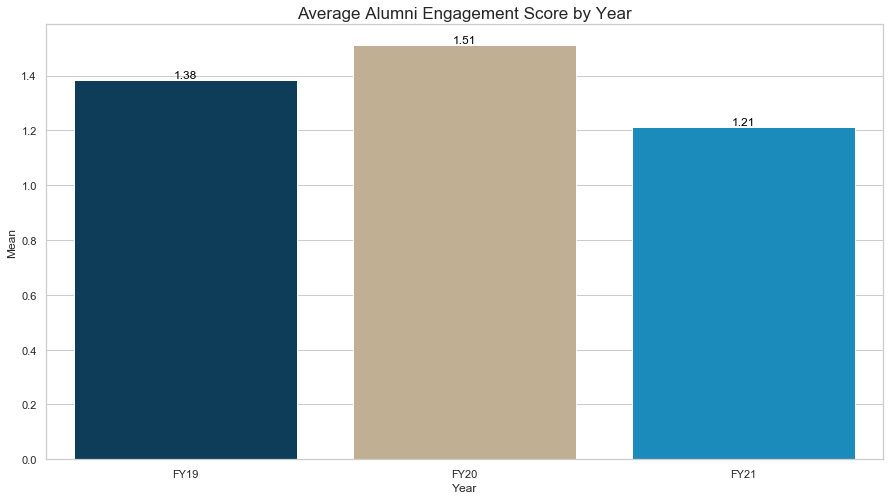

In [415]:
#plot values of overall means for each year

#set custom color palette
colors = ['#004065', '#C8B18B', '#0096D6']
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')

#create barplot
plt.figure(figsize=(15,8)) #set chart size
g = sbn.barplot(x="Year", y="Mean", data=means)
plt.title('Average Alumni Engagement Score by Year', fontsize = 17)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

In [416]:
#create a new data frame with calculated means of engaged alumni
en_means = [['FY19', en_mn19], ['FY20', en_mn20], ['FY21', en_mn21]]
en_means = pd.DataFrame(en_means, columns = ['Year', 'Mean'])
en_means.head()

,Year,Mean
0,FY19,5.860292
1,FY20,7.112854
2,FY21,6.598550


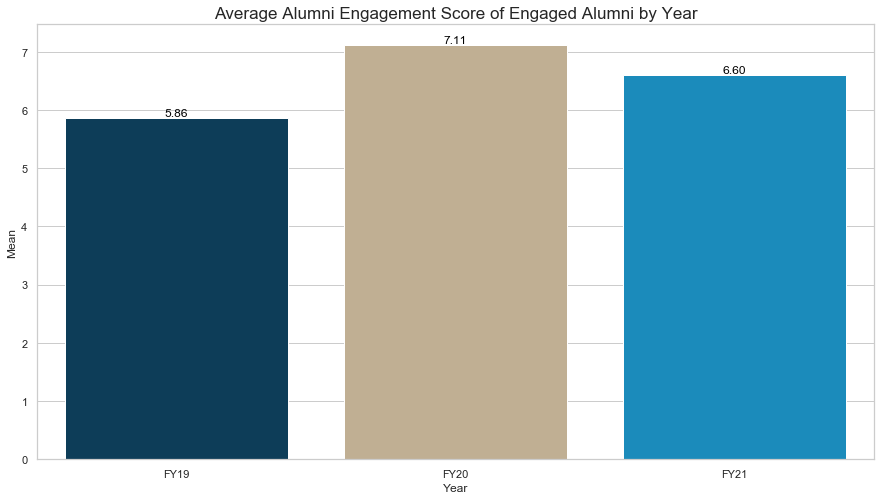

In [417]:
#plot means of engaged alumni for each year

#set custom color palette
colors = ['#004065', '#C8B18B', '#0096D6']
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')

#create barplot
plt.figure(figsize=(15,8)) #set chart size
g = sbn.barplot(x="Year", y="Mean", data=en_means)
plt.title('Average Alumni Engagement Score of Engaged Alumni by Year', fontsize = 17)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

In [418]:
#create a new data frame with calculated propotions of engaged alumni
props = [['FY19', prop19], ['FY20', prop20], ['FY21', prop21]]
props = pd.DataFrame(props, columns = ['Year', 'Proportion'])
props.head()

,Year,Proportion
0,FY19,23.594681
1,FY20,21.247204
2,FY21,18.375259


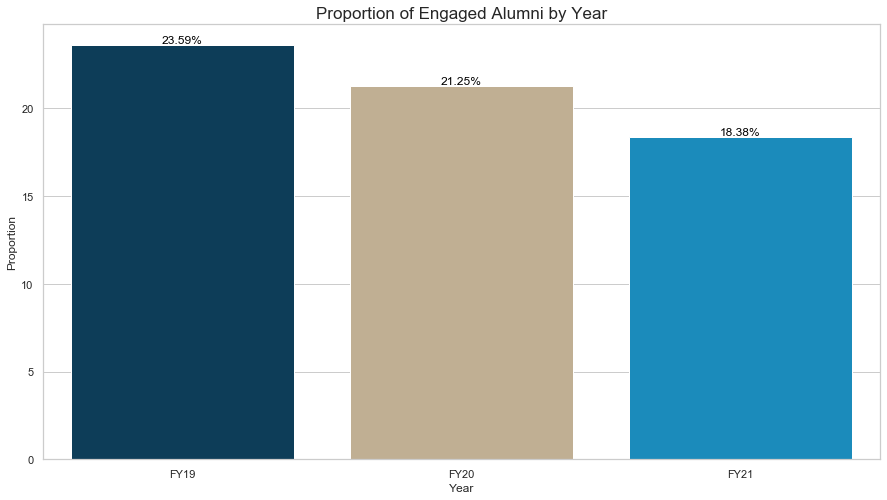

In [482]:
#plot proportions of engaged alumni for each year

#set custom color palette
colors = ['#004065', '#C8B18B', '#0096D6']
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')

#create barplot
plt.figure(figsize=(15,8)) #set chart size
g = sbn.barplot(x="Year", y="Proportion", data=props)
plt.title('Proportion of Engaged Alumni by Year', fontsize = 17)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}%'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

## Average AES for Each School

Text(0.5, 0, 'Frequency')

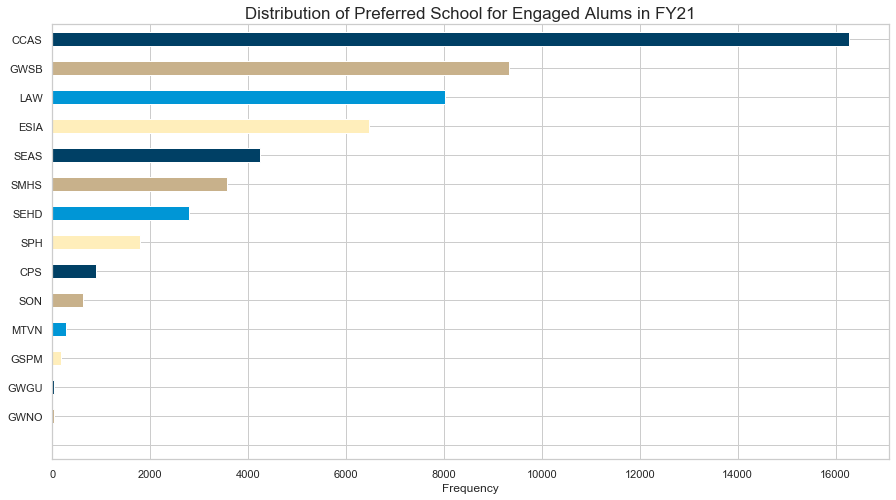

In [420]:
#distribution of Preferred Schools
engaged21['Pref School Code'].value_counts().plot(kind='barh', figsize=(15,8),
                                            color=['#004065', '#c8b18b', '#0096d6', '#ffeebb'] ).invert_yaxis()
plt.title('Distribution of Preferred School for Engaged Alums in FY21', fontsize = 17)
plt.xlabel('Frequency')

In [421]:
#calculate the mean scores of the cohort of alums who were engaged in FY19
fy19_means = engaged19.groupby(['Pref School Code']).mean()
fy19_top = fy19_means.drop(['', 'GWGU', 'GWNO', 'MTVN']) #remove smallest schools
fy19_top.head(10)

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,fy20_aes,fy21_aes,fy21_phil,fy21_vol,fy21_exp,fy21_com
Pref School Code,,,,,,,,,,,,,,,,
CCAS,439589.770697,2.158269,0.544913,2.380999,0.801730,5.885910,2.234019,0.573013,1.221288,1.276879,5.305200,4.340485,1.825090,0.359813,0.856832,1.298749
CPS,584316.253563,0.884798,0.869952,2.355998,0.727435,4.838183,0.944181,0.881829,1.070368,0.834323,3.730701,2.491093,0.791271,0.369656,0.480998,0.849169
ESIA,458611.552141,1.833123,0.687972,2.772670,0.845088,6.138854,1.891688,0.820844,1.476071,1.407431,5.596033,4.545340,1.567380,0.506612,0.942695,1.528652
GSPM,645291.009524,0.404762,0.650794,3.047619,0.888889,4.992063,0.476190,0.785714,1.587302,1.182540,4.031746,2.539683,0.436508,0.388889,0.555556,1.158730
GWSB,422960.953151,2.463139,0.671225,2.239199,0.585414,5.958977,2.548950,0.672810,1.275268,1.189655,5.686683,4.336901,2.100872,0.344233,0.820254,1.071542
LAW,391612.903785,4.183754,0.644178,1.665830,0.364210,6.857972,4.345426,0.618727,1.813880,1.856180,8.634213,6.597362,3.525954,0.317608,1.148910,1.604890
SEAS,478162.603934,1.946721,0.453689,2.291393,0.534426,5.226230,1.997131,0.454508,1.044262,1.101639,4.597541,3.664754,1.654918,0.310656,0.592623,1.106557
SEHD,434849.832044,2.742871,0.283349,1.982842,0.600532,5.609594,2.867327,0.287579,0.974505,1.023441,5.152852,4.052078,2.422064,0.180039,0.503262,0.946713
SMHS,456979.981096,2.911362,0.152874,2.306134,0.462963,5.833333,3.036265,0.186632,1.144387,1.010320,5.377604,4.084201,2.475405,0.114776,0.515529,0.978492


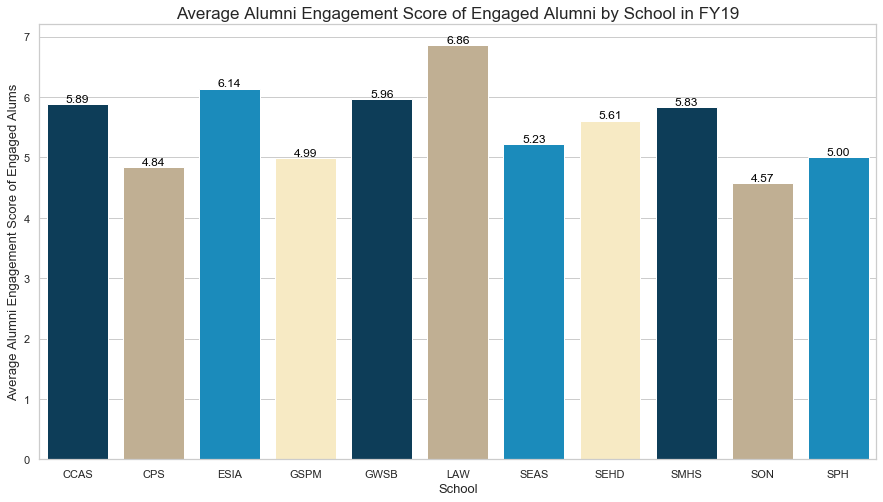

In [422]:
#barplot showing the average AES in FY19 by School
plt.figure(figsize=(15,8)) #set chart size
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))

g = sbn.barplot(data=fy19_top.reset_index(), x = 'Pref School Code', y='fy19_aes', palette=colors) #barplot
plt.title ('Average Alumni Engagement Score of Engaged Alumni by School in FY19', fontsize=17)  
plt.xlabel('School', fontsize=13)
plt.ylabel('Average Alumni Engagement Score of Engaged Alums', fontsize=13)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

In [423]:
#calculate the mean scores of the cohort of alums who were engaged in FY20
fy20_means = engaged20.groupby(['Pref School Code']).mean()
fy20_top = fy20_means.drop(['', 'GWGU', 'GWNO', 'MTVN']) #remove smallest schools
fy20_top.head(10)

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,fy20_aes,fy21_aes,fy21_phil,fy21_vol,fy21_exp,fy21_com
Pref School Code,,,,,,,,,,,,,,,,
CCAS,408192.745638,2.620920,0.644065,1.936202,0.600593,5.801780,2.784421,0.732047,1.757418,1.992136,7.266024,5.552819,2.289169,0.460386,1.051335,1.751929
CPS,566910.620137,1.132723,1.083143,1.847826,0.545385,4.609077,1.281465,1.176583,1.685736,1.521739,5.665523,3.436308,1.098398,0.501526,0.572082,1.264302
ESIA,424360.884040,2.054732,0.750353,2.203037,0.632062,5.640184,2.169492,0.963630,1.953390,2.183263,7.269774,5.424435,1.810028,0.603814,1.085805,1.924788
GSPM,623515.274131,0.492278,0.791506,2.625483,0.675676,4.584942,0.685328,0.994208,2.249035,1.814672,5.743243,3.426641,0.675676,0.492278,0.694981,1.563707
GWSB,396577.132818,2.891149,0.757399,1.797515,0.391847,5.837910,3.057055,0.812547,1.785182,1.788440,7.443224,5.390218,2.532344,0.418606,1.007074,1.432195
LAW,415110.883556,2.788958,0.418738,0.961759,0.175430,4.344885,2.990679,0.426625,1.936663,1.808795,7.162763,5.204111,2.448853,0.226099,1.114723,1.414436
SEAS,431022.086284,2.414530,0.557082,1.612230,0.334758,4.918600,2.538665,0.580993,1.552707,1.951567,6.623932,4.963879,2.113350,0.399369,0.720899,1.730260
SEHD,410435.069714,3.282470,0.312410,1.453572,0.364478,5.412930,3.527625,0.359416,1.423199,1.709575,7.019815,5.189471,2.993925,0.225629,0.591553,1.378363
SMHS,418893.634209,3.506856,0.182431,1.844643,0.247502,5.781432,3.824076,0.237625,1.665698,1.562282,7.289682,5.233558,3.135603,0.148152,0.666396,1.283407


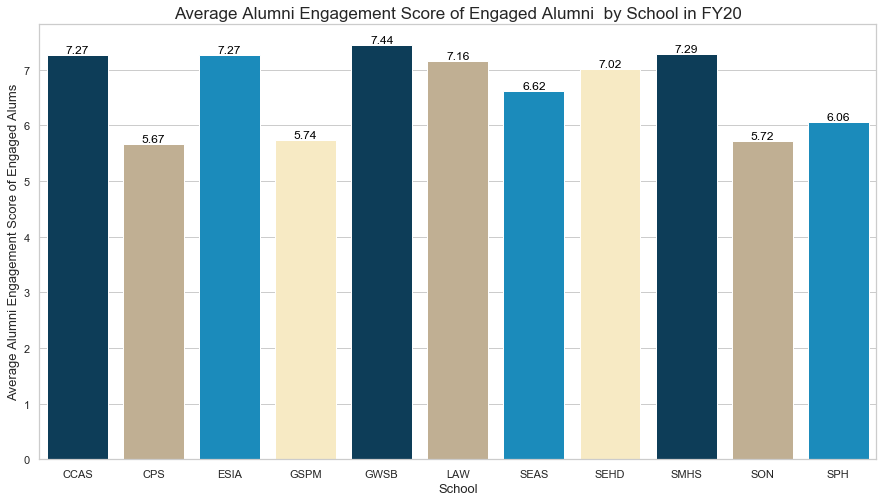

In [424]:
#barplot showing the average AES in FY20 by School
plt.figure(figsize=(15,8)) #set chart size
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))

g = sbn.barplot(data=fy20_top.reset_index(), x = 'Pref School Code', y='fy20_aes', palette=colors) #barplot
plt.title ('Average Alumni Engagement Score of Engaged Alumni  by School in FY20', fontsize=17)  
plt.xlabel('School', fontsize=13)
plt.ylabel('Average Alumni Engagement Score of Engaged Alums', fontsize=13)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

In [425]:
#calculate the mean scores of the cohort of alums who were engaged in FY21
fy21_means = engaged21.groupby(['Pref School Code']).mean()
fy21_top = fy21_means.drop(['', 'GWGU', 'GWNO', 'MTVN']) #remove smallest schools
fy21_top.head(10)

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,fy20_aes,fy21_aes,fy21_phil,fy21_vol,fy21_exp,fy21_com
Pref School Code,,,,,,,,,,,,,,,,
CCAS,384365.596585,2.606105,0.646920,1.618451,0.754868,5.626344,2.778085,0.734138,1.355875,1.893772,6.761870,6.470272,2.372244,0.479547,1.458602,2.159880
CPS,536573.036158,1.604520,1.144068,1.734463,0.937853,5.420904,1.827684,1.305085,1.302260,1.994350,6.429379,5.709040,1.627119,0.742938,1.093220,2.245763
ESIA,410303.132644,2.162214,0.800263,2.021695,0.799876,5.784049,2.292310,1.028027,1.661133,2.071881,7.053351,6.627934,1.981547,0.662446,1.491275,2.492665
GSPM,600406.193370,0.635359,0.966851,2.306630,1.022099,4.930939,0.925414,1.229282,1.975138,2.209945,6.339779,5.414365,0.966851,0.704420,1.091160,2.651934
GWSB,365653.428847,3.180454,0.784666,1.570671,0.537398,6.073189,3.376554,0.841459,1.512538,1.877411,7.607962,6.731140,2.919256,0.482480,1.397075,1.932330
LAW,399149.829909,3.515751,0.469431,1.003300,0.244054,5.232536,3.786577,0.487175,1.956481,2.044577,8.274810,6.963952,3.196675,0.295106,1.527830,1.944341
SEAS,396477.669498,2.701109,0.625737,1.401864,0.528427,5.257136,2.852678,0.651097,1.124676,2.123142,6.751592,6.308681,2.452229,0.465322,1.112880,2.278250
SEHD,373604.303411,3.830341,0.356373,1.263016,0.585278,6.035009,4.147217,0.412926,1.108618,1.934470,7.603232,6.909336,3.716338,0.282765,0.862657,2.047576
SMHS,368987.700646,4.031873,0.190256,1.531873,0.433867,6.187869,4.434850,0.255546,1.309323,1.706684,7.706403,6.880792,3.826172,0.179023,1.010250,1.865347


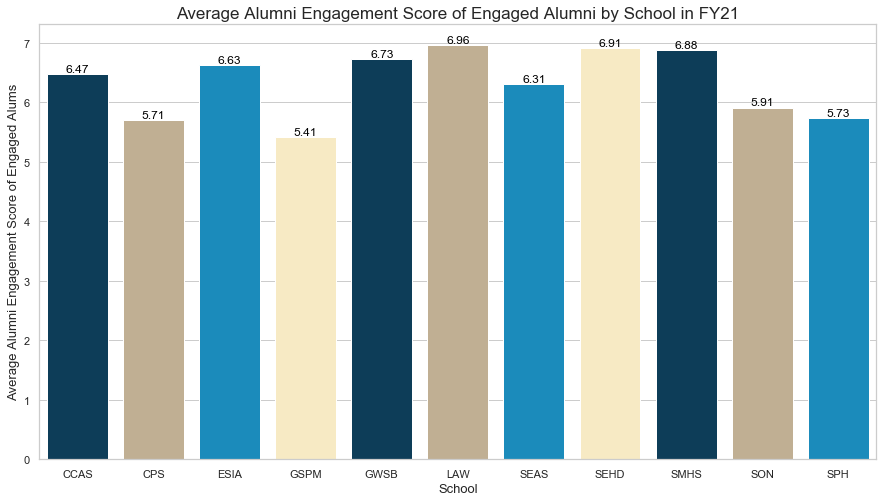

In [426]:
#barplot showing the average AES in FY21 by School
plt.figure(figsize=(15,8)) #set chart size
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))

g = sbn.barplot(data=fy21_top.reset_index(), x = 'Pref School Code', y='fy21_aes', palette=colors) #barplot
plt.title ('Average Alumni Engagement Score of Engaged Alumni by School in FY21', fontsize=17)  
plt.xlabel('School', fontsize=13)
plt.ylabel('Average Alumni Engagement Score of Engaged Alums', fontsize=13)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

In [427]:
reset19 = fy19_top.reset_index()
aes19av = reset19[['Pref School Code', 'fy19_aes']].copy()
aes19av.head()

,Pref School Code,fy19_aes
0,CCAS,5.885910
1,CPS,4.838183
2,ESIA,6.138854
3,GSPM,4.992063
4,GWSB,5.958977


In [428]:
reset20 = fy20_top.reset_index()
aes20av = reset20[['Pref School Code', 'fy20_aes']].copy()
aes20av.head()

,Pref School Code,fy20_aes
0,CCAS,7.266024
1,CPS,5.665523
2,ESIA,7.269774
3,GSPM,5.743243
4,GWSB,7.443224


In [429]:
reset21 = fy21_top.reset_index()
aes21av = reset21[['Pref School Code', 'fy21_aes']].copy()
aes21av.head()

,Pref School Code,fy21_aes
0,CCAS,6.470272
1,CPS,5.709040
2,ESIA,6.627934
3,GSPM,5.414365
4,GWSB,6.731140


In [430]:
merge1 = pd.merge(aes19av, aes20av, on = ['Pref School Code'], how = 'inner')
merge1.head()

,Pref School Code,fy19_aes,fy20_aes
0,CCAS,5.885910,7.266024
1,CPS,4.838183,5.665523
2,ESIA,6.138854,7.269774
3,GSPM,4.992063,5.743243
4,GWSB,5.958977,7.443224


In [431]:
allmeans = pd.merge(merge1, aes21av, on = ['Pref School Code'], how = 'inner')
print(allmeans)

   Pref School Code  fy19_aes  fy20_aes  fy21_aes
0              CCAS  5.885910  7.266024  6.470272
1               CPS  4.838183  5.665523  5.709040
2              ESIA  6.138854  7.269774  6.627934
3              GSPM  4.992063  5.743243  5.414365
4              GWSB  5.958977  7.443224  6.731140
5               LAW  6.857972  7.162763  6.963952
6              SEAS  5.226230  6.623932  6.308681
7              SEHD  5.609594  7.019815  6.909336
8              SMHS  5.833333  7.289682  6.880792
9               SON  4.573841  5.721649  5.913078
10              SPH  4.997488  6.063009  5.730384


In [432]:
#calculate change in average AES year over year for each school 
allmeans['ch19_20'] = allmeans['fy20_aes'] - allmeans['fy19_aes']
allmeans['ch20_21'] = allmeans['fy21_aes'] - allmeans['fy20_aes']
allmeans['ch19_21'] = allmeans['fy21_aes'] - allmeans['fy19_aes']
allmeans.head()

,Pref School Code,fy19_aes,fy20_aes,fy21_aes,ch19_20,ch20_21,ch19_21
0,CCAS,5.885910,7.266024,6.470272,1.380113,-0.795752,0.584362
1,CPS,4.838183,5.665523,5.709040,0.827340,0.043517,0.870857
2,ESIA,6.138854,7.269774,6.627934,1.130920,-0.641840,0.489080
3,GSPM,4.992063,5.743243,5.414365,0.751180,-0.328879,0.422301
4,GWSB,5.958977,7.443224,6.731140,1.484247,-0.712084,0.772163


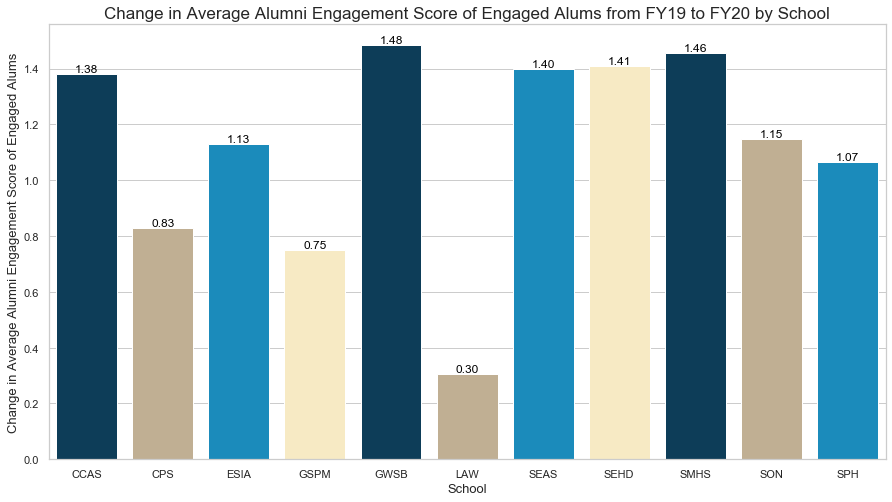

In [433]:
#barplot showing the change in the average AES from FY19 to FY20 by School
plt.figure(figsize=(15,8)) #set chart size
g = sbn.barplot(data=allmeans, x = "Pref School Code", y='ch19_20', palette= colors) #barplot
plt.title ('Change in Average Alumni Engagement Score of Engaged Alums from FY19 to FY20 by School', fontsize=17)  
plt.xlabel('School', fontsize=13)
plt.ylabel('Change in Average Alumni Engagement Score of Engaged Alums', fontsize=13)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

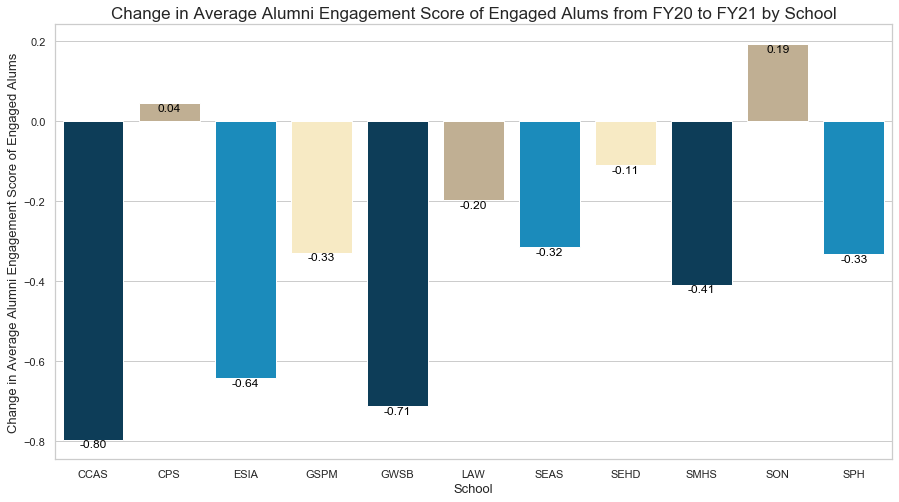

In [434]:
#barplot showing the change in the average AES from FY20 to FY21 by School
plt.figure(figsize=(15,8)) #set chart size
g = sbn.barplot(data=allmeans, x = "Pref School Code", y='ch20_21', palette= colors) #barplot
plt.title ('Change in Average Alumni Engagement Score of Engaged Alums from FY20 to FY21 by School', fontsize=17)  
plt.xlabel('School', fontsize=13)
plt.ylabel('Change in Average Alumni Engagement Score of Engaged Alums', fontsize=13)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='top')
plt.show()

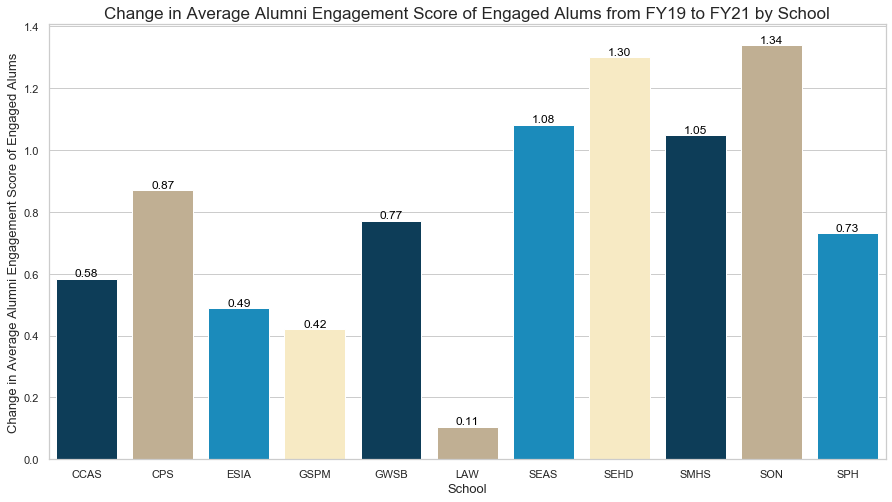

In [435]:
#barplot showing the change in the average AES from FY19 to FY21 by School
plt.figure(figsize=(15,8)) #set chart size
g = sbn.barplot(data=allmeans, x = "Pref School Code", y='ch19_21', palette= colors) #barplot
plt.title ('Change in Average Alumni Engagement Score of Engaged Alums from FY19 to FY21 by School', fontsize=17)  
plt.xlabel('School', fontsize=13)
plt.ylabel('Change in Average Alumni Engagement Score of Engaged Alums', fontsize=13)

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

# Alumni Engagement Score by Demographic Cohorts

Now that we've looked at the average Alumni Engagement Scores by fiscal year and school, let's examine the averages by  demographic information of four different cohorts of alumni: 

- Alumni who were Student Athletes
- Alumni who participated in Student Activities
- Alumni with two or more degrees from GW
- All Alumni

## Are Student Athletes More Engaged Than Other Alumni?

In [436]:
#subset data for only student atheletes 
athl = data[data['Sport1'] != '']
athl['Sport1'].head()

19             Badminton - Women
95             Badminton - Women
161    Swimming and Diving - Men
297                   Crew - Men
318                   Crew - Men
Name: Sport1, dtype: object

In [437]:
#mean AES in FY19 for all student atheletes 
mnathl19 = athl['fy19_aes'].mean()
mnathl19

4.333714167012879

In [438]:
#mean AES in FY20 for all student atheletes 
mnathl20 = athl['fy20_aes'].mean()
mnathl20

5.3427503115911925

In [439]:
#mean AES in FY21 for all student atheletes 
mnathl21 = athl['fy21_aes'].mean()
mnathl21

4.997922725384296

In [440]:
#mean AES in FY19 for engaged alumni who were student atheletes
engaged_athl19 = athl[athl['fy19_aes'] != 0]
mn_engaged19 = engaged_athl19['fy19_aes'].mean()
mn_engaged19

8.840042372881356

In [441]:
#mean AES in FY20 for engaged alumni who were student atheletes
engaged_athl20 = athl[athl['fy20_aes'] != 0]
mn_engaged20 = engaged_athl20['fy20_aes'].mean()
mn_engaged20

9.965129794653235

In [442]:
#mean AES in FY21 for engaged alumni who were student atheletes
engaged_athl21 = athl[athl['fy21_aes'] != 0]
mn_engaged21 = engaged_athl21['fy21_aes'].mean()
mn_engaged21

8.251028806584362

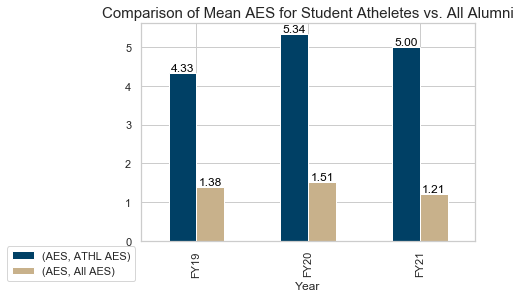

In [443]:
#create dataframe comparing means for student atheletes and all alumni
athl_comp = pd.DataFrame([['FY19',  'FY20', 'FY21','FY19','FY20',  'FY21'], 
                          ['ATHL AES', 'ATHL AES', 'ATHL AES', 'All AES', 'All AES', 'All AES'],
                          [mnathl19, mnathl20, mnathl21, mn19, mn20, mn21]]).T
athl_comp.columns = ['Year', 'Type', 'AES']
athl_comp.set_index(['Year', 'Type'], inplace=True)
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')
athl_comp.unstack().plot.bar()
plt.legend().set_bbox_to_anchor((0,0)) #move legend outside chart
plt.title('Comparison of Mean AES for Student Atheletes vs. All Alumni', fontsize = 15)
#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

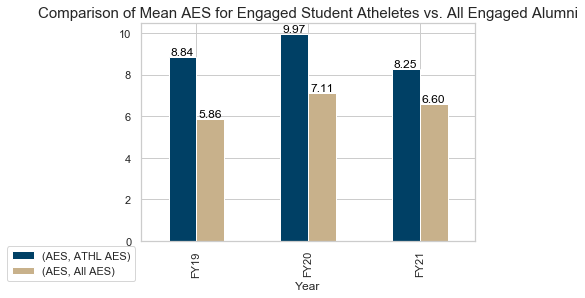

In [445]:
#create dataframe comparing means of engaged student atheletes and all engaged alumni
athl_comp2 = pd.DataFrame([['FY19',  'FY20', 'FY21','FY19','FY20',  'FY21'], 
                          ['ATHL AES', 'ATHL AES', 'ATHL AES', 'All AES', 'All AES', 'All AES'],
                          [mn_engaged19, mn_engaged20, mn_engaged21, en_mn19, en_mn20, en_mn21]]).T
athl_comp2.columns = ['Year', 'Type', 'AES']
athl_comp2.set_index(['Year', 'Type'], inplace=True)

athl_comp2.unstack().plot.bar()
plt.legend().set_bbox_to_anchor((0,0)) #move legend outside chart
plt.title('Comparison of Mean AES for Engaged Student Atheletes vs. All Engaged Alumni', fontsize = 15)
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')
#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

## Are Students that Participated in Student Activities More Engaged than Other Alumni?

In [446]:
#subset data for only alumni who participated in student activities 
act = data[data['Student Activity1'] != '']
act['Student Activity1'].head()

20     Organization of Latino Amer S
94               Senior Class Cruise
106              Senior Class Cruise
114       HSMP Alumni Assn - Student
170                           Hillel
Name: Student Activity1, dtype: object

In [447]:
#mean AES in FY19 for alumni who participated in student activities
mnact19 = act['fy19_aes'].mean()
mnact19

2.460529056446574

In [448]:
#mean AES in FY20 for alumni who participated in student activities
mnact20 = act['fy20_aes'].mean()
mnact20

2.811601749635493

In [449]:
#mean AES in FY21 for alumni who participated in student activities
mnact21 = act['fy21_aes'].mean()
mnact21

2.3380545719641743

In [450]:
#mean AES in FY19 for engaged alumni who participated in student activities
engaged_act19 = act[act['fy19_aes'] != 0]
en_actmn19 = engaged_act19['fy19_aes'].mean()
en_actmn19

7.160695884100139

In [451]:
#mean AES in FY20 for engaged alumni who participated in student activities
engaged_act20 = act[act['fy20_aes'] != 0]
en_actmn20 = engaged_act20['fy20_aes'].mean()
en_actmn20

8.25646828552205

In [452]:
#mean AES in FY21 for engaged alumni who participated in student activities
engaged_act21 = act[act['fy21_aes'] != 0]
en_actmn21 = engaged_act21['fy21_aes'].mean()
en_actmn21

7.16657089957224

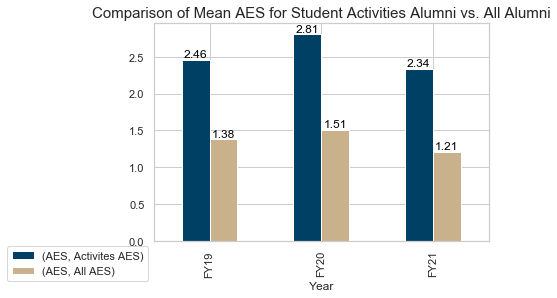

In [453]:
#create dataframe comparing means for alumni who participated in student activities and all alumni
act_comp1 = pd.DataFrame([['FY19',  'FY20', 'FY21','FY19','FY20',  'FY21'], 
                          ['Activites AES', 'Activites AES', 'Activites AES', 'All AES', 'All AES', 'All AES'],
                          [mnact19, mnact20, mnact21, mn19, mn20, mn21]]).T
act_comp1.columns = ['Year', 'Type', 'AES']
act_comp1.set_index(['Year', 'Type'], inplace=True)

act_comp1.unstack().plot.bar()
plt.legend().set_bbox_to_anchor((0,0)) #move legend outside chart
plt.title('Comparison of Mean AES for Student Activities Alumni vs. All Alumni', fontsize = 15)
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')
#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

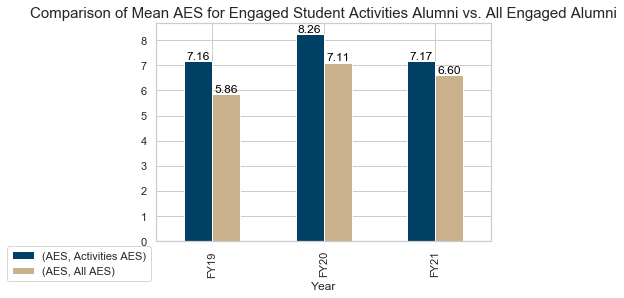

In [454]:
#create dataframe comparing means of engaged alumni who participated in student activities and all engaged alumni
act_comp2 = pd.DataFrame([['FY19',  'FY20', 'FY21','FY19','FY20',  'FY21'], 
                          ['Activities AES', 'Activities AES', 'Activities AES', 'All AES', 'All AES', 'All AES'],
                          [en_actmn19, en_actmn20, en_actmn21, en_mn19, en_mn20, en_mn21]]).T
act_comp2.columns = ['Year', 'Type', 'AES']
act_comp2.set_index(['Year', 'Type'], inplace=True)

act_comp2.unstack().plot.bar()
plt.legend().set_bbox_to_anchor((0,0)) #move legend outside chart
plt.title('Comparison of Mean AES for Engaged Student Activities Alumni vs. All Engaged Alumni', fontsize = 15)
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')
#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

## Are Alumni With Two or More Degrees from GW More Engaged Than Other Alumni?

In [455]:
#subset data for only alumni have two or more degrees from GW
double = data[data['Class2'] != '']
double['Class2'].head()

0     1985
2     1986
5     1984
13    1985
18    1989
Name: Class2, dtype: object

In [456]:
#mean AES in FY19 for alumni who have two or more degrees from GW
mn_double19 = double['fy19_aes'].mean()
mn_double19

1.999523279834737

In [457]:
#mean AES in FY20 for alumni who have two or more degrees from GW
mn_double20 = double['fy20_aes'].mean()
mn_double20

2.148021611314159

In [458]:
#mean AES in FY21 for alumni who have two or more degrees from GW
mn_double21 = double['fy21_aes'].mean()
mn_double21

1.7374860956618465

In [459]:
#mean AES in FY19 for engaged alumni who have two or more degrees from GW
en_double19 = double[double['fy19_aes'] != 0]
en_double19 = en_double19['fy19_aes'].mean()
en_double19

6.594863731656185

In [460]:
#mean AES in FY20 for engaged alumni who have two or more degrees from GW
en_double20 = double[double['fy20_aes'] != 0]
en_double20 = en_double20['fy20_aes'].mean()
en_double20

8.318461538461538

In [461]:
#mean AES in FY21 for engaged alumni who have two or more degrees from GW
en_double21 = double[double['fy21_aes'] != 0]
en_double21 = en_double21['fy21_aes'].mean()
en_double21

7.481866703161352

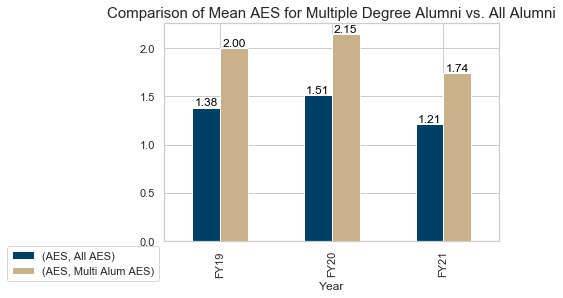

In [462]:
#create dataframe comparing means for alumni who two or more degrees from GW and all alumni
double_comp = pd.DataFrame([['FY19',  'FY20', 'FY21','FY19','FY20',  'FY21'], 
                          ['Multi Alum AES', 'Multi Alum AES', 'Multi Alum AES', 'All AES', 'All AES', 'All AES'],
                          [mn_double19, mn_double20, mn_double21, mn19, mn20, mn21]]).T
double_comp.columns = ['Year', 'Type', 'AES']
double_comp.set_index(['Year', 'Type'], inplace=True)

double_comp.unstack().plot.bar()
plt.legend().set_bbox_to_anchor((0,0)) #move legend outside chart
plt.title('Comparison of Mean AES for Multiple Degree Alumni vs. All Alumni', fontsize = 15)
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')
#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

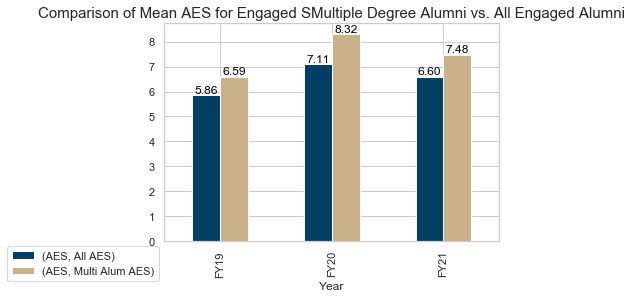

In [463]:
#create dataframe comparing means of engaged alumni who participated in student activities and all engaged alumni
en_double = pd.DataFrame([['FY19',  'FY20', 'FY21','FY19','FY20',  'FY21'], 
                          ['Multi Alum AES', 'Multi Alum AES', 'Multi Alum AES', 'All AES', 'All AES', 'All AES'],
                          [en_double19, en_double20, en_double21, en_mn19, en_mn20, en_mn21]]).T
en_double.columns = ['Year', 'Type', 'AES']
en_double.set_index(['Year', 'Type'], inplace=True)

en_double.unstack().plot.bar()
plt.legend().set_bbox_to_anchor((0,0)) #move legend outside chart
plt.title('Comparison of Mean AES for Engaged SMultiple Degree Alumni vs. All Engaged Alumni', fontsize = 15)
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')
#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}'.format(p.get_height()),
           fontsize = 12, color='black', ha = 'center', va='bottom')
plt.show()

## Comparison of Cohorts of Alumni

So far, we have calculated the average Alumni Engagement Scores for four cohorts of Alumni:

- Alumni who were Student Athletes
- Alumni who participated in Student Activities
- Alumni with two or more degrees from GW
- All Alumni

Let's see how these averages compare with each other over the last three years.

In [466]:
line_comp = pd.DataFrame([[2019, 2020, 2021,2019, 2020, 2021,2019, 2020, 2021,2019, 2020, 2021], 
                          ['ATHL AES', 'ATHL AES', 'ATHL AES', 'Activites AES', 'Activites AES', 'Activites AES',
                           'Multi Alum AES', 'Multi Alum AES', 'Multi Alum AES','All AES', 'All AES', 'All AES'],
                          [mnathl19, mnathl20, mnathl21, mnact19, mnact20, mnact21, 
                           mn_double19, mn_double20, mn_double21, mn19, mn20, mn21]]).T
line_comp.columns = ['Year', 'Type', 'AES']
line_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
Year    12 non-null object
Type    12 non-null object
AES     12 non-null object
dtypes: object(3)
memory usage: 368.0+ bytes


In [467]:
line_comp['AES'] = line_comp['AES'].astype(float)
line_comp.head()

,Year,Type,AES
0,2019,ATHL AES,4.333714
1,2020,ATHL AES,5.342750
2,2021,ATHL AES,4.997923
3,2019,Activites AES,2.460529
4,2020,Activites AES,2.811602


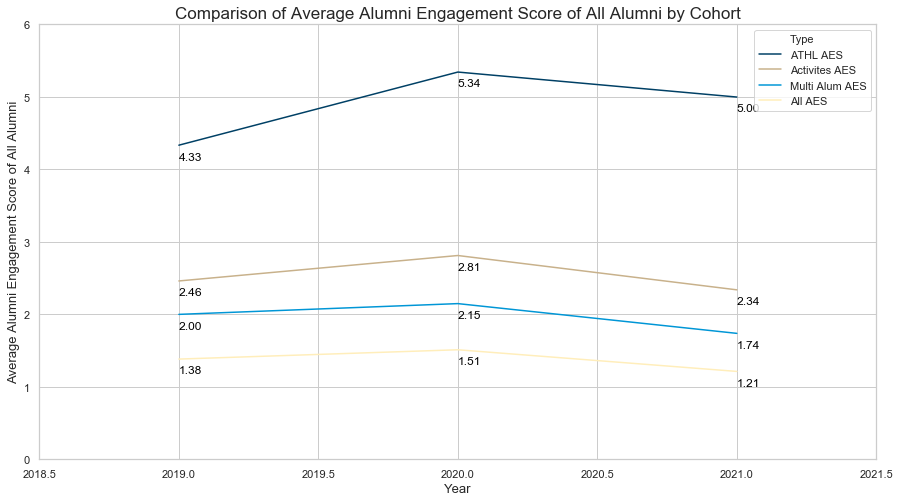

In [468]:
#comparison of all alumni AES over three years for three cohorts
plt.figure(figsize = (15,8))
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))

sbn.set(style='whitegrid',)
g = sbn.lineplot(data= line_comp, x="Year", y="AES", hue="Type", palette = colors, 
             markers = ["o"], legend = 'brief',)
plt.title("Comparison of Average Alumni Engagement Score of All Alumni by Cohort", fontsize = 17)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Average Alumni Engagement Score of All Alumni", fontsize = 13)
g.set(xlim=(2018.5,2021.5), ylim=(0,6)) #set limits for x and y-axis
#add data labels
for x, y in zip(line_comp['Year'], line_comp['AES']):
    plt.text(x = x, y = y-0.2, s = '{:.2f}'.format(y), color = 'black')

In [469]:
line_comp_en = pd.DataFrame([[2019, 2020, 2021,2019, 2020, 2021,2019, 2020, 2021,2019, 2020, 2021], 
                          ['ATHL AES', 'ATHL AES', 'ATHL AES', 'Activites AES', 'Activites AES', 'Activites AES',
                           'Multi Alum AES', 'Multi Alum AES', 'Multi Alum AES','All AES', 'All AES', 'All AES'],
                          [mn_engaged19, mn_engaged20, mn_engaged21, en_actmn19, en_actmn20, en_actmn21,
                           en_double19, en_double20, en_double21,en_mn19, en_mn20, en_mn21]]).T
line_comp_en.columns = ['Year', 'Type', 'AES']
line_comp_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
Year    12 non-null object
Type    12 non-null object
AES     12 non-null object
dtypes: object(3)
memory usage: 368.0+ bytes


In [470]:
line_comp_en['AES'] = line_comp_en['AES'].astype(float)
line_comp_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
Year    12 non-null object
Type    12 non-null object
AES     12 non-null float64
dtypes: float64(1), object(2)
memory usage: 368.0+ bytes


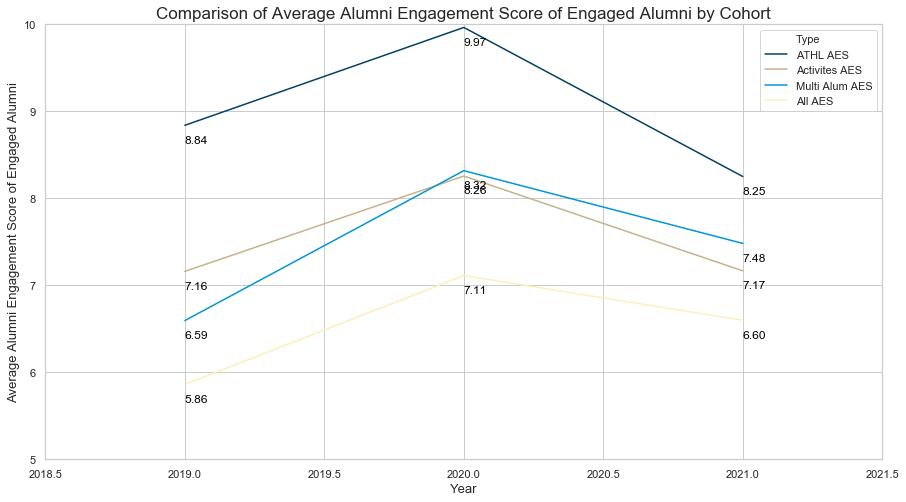

In [471]:
#comparison of engaged alumni AES over three years for three cohorts
plt.figure(figsize = (15,8))
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))

sbn.set(style='whitegrid',)
g = sbn.lineplot(data= line_comp_en, x="Year", y="AES", hue="Type", palette = colors, 
             markers = ["o"], legend = 'brief',)
plt.title("Comparison of Average Alumni Engagement Score of Engaged Alumni by Cohort", fontsize = 17)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Average Alumni Engagement Score of Engaged Alumni", fontsize = 13)
g.set(xlim=(2018.5,2021.5), ylim=(5,10)) #set limits for x and y-axis
#add data labels
for x, y in zip(line_comp['Year'], line_comp_en['AES']):
    plt.text(x = x, y = y-0.2, s = '{:.2f}'.format(y), color = 'black')

## Where Do GW Alumni Live? 

In [472]:
states = data[data['Pref Country'] == ''].copy()
states = states[states['Pref State'] != '']
states['Pref Country'].head()

4     
5     
10    
11    
13    
Name: Pref Country, dtype: object

In [473]:
usa = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
states = states[states['Pref State'].isin(usa)]
states['Pref State'].head()

4     DC
5     VA
10    WA
11    FL
13    VA
Name: Pref State, dtype: object

In [474]:
usa_count = pd.DataFrame(states['Pref State'].value_counts())
usa_count.head()
usa_count.index.name = 'Pref State'
usa_count.columns = ['count']
usa_count.reset_index(inplace=True)
usa_count.head()

,Pref State,count
0,VA,53818
1,MD,37597
2,DC,19327
3,CA,17826
4,NY,16608


In [475]:
#create a map of the United States shading the distribution of prospects
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = usa_count['Pref State'],
    z = usa_count['count'],
    text = usa_count['Pref State'],
    locationmode='USA-states',
    autocolorscale=True,
    marker_line_color='rgb(255,255,255)',
    marker_line_width=2,
    colorbar_tickprefix = '',
    colorbar_title = 'Geographic Distribution of All Alumni'
))
    
fig.update_layout(
    title_text = 'Geographic Distribution of All Alumni',
    geo= dict(
        showframe=False,
        showcoastlines=True,
        showlakes=True,
        lakecolor='rgb(95,145,237)',
        projection_type='albers usa'),
)
fig.show()

## Where Do GW Alumni Engaged in FY21 Live?

In [476]:
en_states = states[states['fy21_aes'] != 0]
en_states.head()

,ID,fy19_phil,fy19_vol,fy19_exp,fy19_com,fy19_aes,fy20_phil,fy20_vol,fy20_exp,fy20_com,...,fy21_exp,fy21_com,Lifetime Commitments,Sport1,Sport2,Sport3,Student Activity1,Student Activity2,Student Activity3,Student Activity4
18,100020,2.5,0.0,0.0,0,2.5,2.5,0.0,0.0,2.5,...,0.0,2.5,880,,,,,,,
42,100045,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.5,...,0.0,2.5,,,,,,,,
75,100078,10.0,0.0,0.0,0,10.0,10.0,0.0,0.0,2.5,...,0.0,0.0,460,,,,,,,
138,100142,10.0,0.0,2.5,0,12.5,10.0,0.0,0.0,2.5,...,0.0,2.5,165,,,,,,,
168,100172,0.0,0.0,2.5,0,2.5,0.0,0.0,2.5,2.5,...,0.0,2.5,,,,,,,,


In [477]:
en_usa_count = pd.DataFrame(en_states['Pref State'].value_counts())
en_usa_count.head()
en_usa_count.index.name = 'Pref State'
en_usa_count.columns = ['count']
en_usa_count.reset_index(inplace=True)
en_usa_count.head()

,Pref State,count
0,VA,9514
1,MD,6786
2,DC,5581
3,NY,4364
4,CA,4212


In [478]:
#create a map of the United States shading the distribution of prospects
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = en_usa_count['Pref State'],
    z = en_usa_count['count'],
    text = en_usa_count['Pref State'],
    locationmode='USA-states',
    autocolorscale=True,
    marker_line_color='rgb(255,255,255)',
    marker_line_width=2,
    colorbar_tickprefix = '',
    colorbar_title = 'Geographic Distribution of Alumni Engaged in FY21'
))
    
fig.update_layout(
    title_text = 'Geographic Distribution of Alumni Engaged in FY21',
    geo= dict(
        showframe=False,
        showcoastlines=True,
        showlakes=True,
        lakecolor='rgb(95,145,237)',
        projection_type='albers usa'),
)
fig.show()

## Alumni Engagement Score Subscores

Are any of the four subscores that make up the overall Alumni Engagement Score highly correlated with each other?

In [479]:
corrMatrix = data.corr()
print(corrMatrix)

                 ID  fy19_phil  fy19_vol  fy19_exp  fy19_com  fy19_aes  \
ID         1.000000  -0.042851  0.007331  0.269934  0.068959  0.111130   
fy19_phil -0.042851   1.000000  0.234213  0.188715  0.052689  0.760946   
fy19_vol   0.007331   0.234213  1.000000  0.259052  0.075244  0.551304   
fy19_exp   0.269934   0.188715  0.259052  1.000000  0.121009  0.645645   
fy19_com   0.068959   0.052689  0.075244  0.121009  1.000000  0.395579   
fy19_aes   0.111130   0.760946  0.551304  0.645645  0.395579  1.000000   
fy20_phil -0.042456   0.950693  0.223677  0.190528  0.053608  0.729458   
fy20_vol   0.024771   0.227440  0.877520  0.274957  0.080409  0.521364   
fy20_exp   0.157838   0.229405  0.284701  0.563773  0.090289  0.482901   
fy20_com   0.033900   0.449817  0.257183  0.254838  0.377912  0.560097   
fy20_aes   0.047685   0.773540  0.514072  0.438265  0.200933  0.852310   
fy21_aes   0.021730   0.749920  0.448826  0.368945  0.249211  0.804571   
fy21_phil -0.043149   0.891479  0.2065

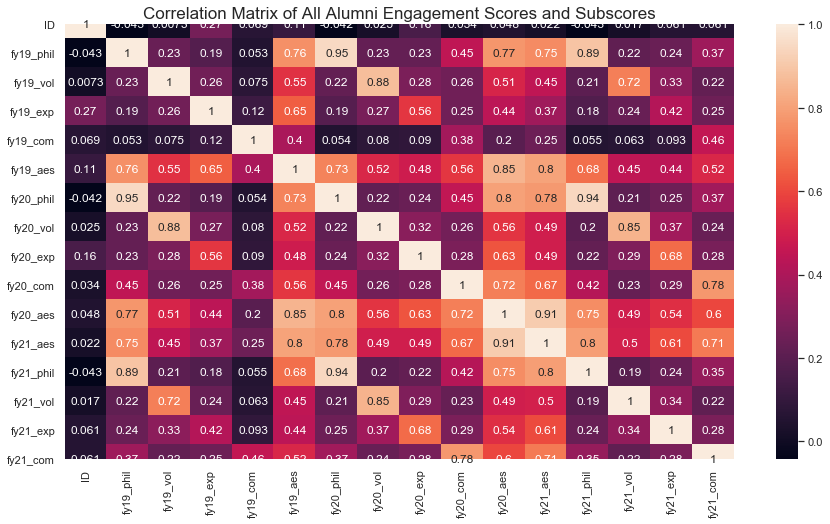

In [486]:
#correlation matrix heat map
plt.figure(figsize = (15,8))
sbn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix of All Alumni Engagement Scores and Subscores', fontsize = 17)
plt.show()

## How are GW Alumni Most Engaged?

CASE recommends measuring engagement by looking at where alumni are engaged within the four subscores as well as looking at where newly enaged alumni are the connecting with the university.[$^{9}$](https://www.case.org/system/files/media/file/CASE%20Alumni%20Engagement%20Metrics%20Year%201_0.pdf)

In [549]:
#calculate the proportions of alumni that are engaged within each subscore for each FY
prop_phil19 = (nm.count_nonzero(engaged19['fy19_phil'])/len(engaged19))*100
prop_vol19 = (nm.count_nonzero(engaged19['fy19_vol'])/len(engaged19))*100
prop_exp19 = (nm.count_nonzero(engaged19['fy19_exp'])/len(engaged19))*100
prop_com19 = (nm.count_nonzero(engaged19['fy19_com'])/len(engaged19))*100

prop_phil20 = (nm.count_nonzero(engaged19['fy20_phil'])/len(engaged20))*100
prop_vol20 = (nm.count_nonzero(engaged19['fy20_vol'])/len(engaged20))*100
prop_exp20 = (nm.count_nonzero(engaged19['fy20_exp'])/len(engaged20))*100
prop_com20 = (nm.count_nonzero(engaged19['fy20_com'])/len(engaged20))*100

prop_phil21 = (nm.count_nonzero(engaged19['fy21_phil'])/len(engaged21))*100
prop_vol21 = (nm.count_nonzero(engaged19['fy21_vol'])/len(engaged21))*100
prop_exp21 = (nm.count_nonzero(engaged19['fy21_exp'])/len(engaged21))*100
prop_com21 = (nm.count_nonzero(engaged19['fy21_com'])/len(engaged21))*100

props_aes = pd.DataFrame([[2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021], 
                          ['Philanthropic', 'Volunteer', 'Experiential', 'Communication', 
                           'Philanthropic', 'Volunteer', 'Experiential', 'Communication',
                           'Philanthropic', 'Volunteer', 'Experiential', 'Communication',
                           'Philanthropic', 'Volunteer', 'Experiential', 'Communication'],
                          [prop_phil19, prop_vol19, prop_exp19, prop_com19, prop_phil20, prop_vol20, prop_exp20,
                          prop_com20, prop_phil21, prop_vol21, prop_exp21, prop_com21]]).T
props_aes.columns = ['Year', 'Type', 'Proportion']
props_aes['Proportion'] = props_aes['Proportion'].astype(float)
props_aes.set_index(['Year', 'Type'], inplace=True)
props_aes.drop(props_aes[props_aes['Proportion'].isnull()].index, inplace=True)
props_aes.head(20)

Proportion
Year Type                     
2019 Philanthropic   34.074751
     Volunteer       10.495960
     Experiential    67.729778
     Communication   10.848585
2020 Philanthropic   38.825562
     Volunteer       11.465352
     Experiential    37.286174
     Communication   37.308369
2021 Philanthropic   37.843486
     Volunteer        9.838500
     Experiential    29.236861
     Communication   39.845282

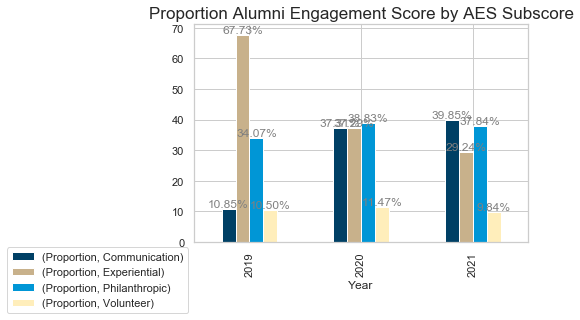

In [572]:
#create chart comparing the proportions for each year
props_aes.unstack().plot.bar()
plt.legend().set_bbox_to_anchor((0,0)) #move legend outside chart
plt.title('Proportion Alumni Engagement Score by AES Subscore', fontsize = 17)
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
sbn.set_style('whitegrid')

#add data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:0.2f}%'.format(p.get_height()),
           fontsize = 12, color='grey', ha = 'center', va='bottom')
plt.show()

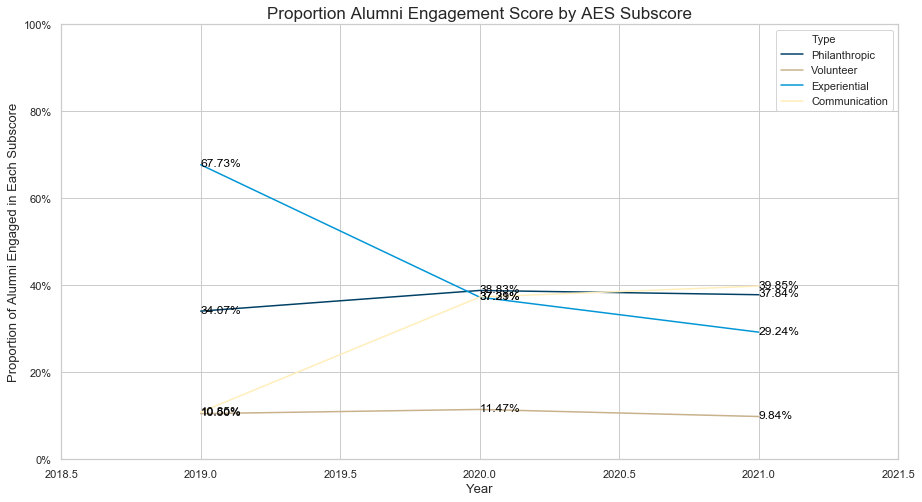

In [568]:
#comparison of all alumni AES over three years for three cohorts
plt.figure(figsize = (15,8))
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB'] #set custom color palette
sbn.set_palette(sbn.color_palette(colors))
#plt.legend().set_bbox_to_anchor((1,1)) 
sbn.set(style='whitegrid',)
g = sbn.lineplot(data= props_aes.reset_index(), x="Year", y="Proportion", hue="Type", palette = colors)
plt.title("Proportion Alumni Engagement Score by AES Subscore", fontsize = 17)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Proportion of Alumni Engaged in Each Subscore", fontsize = 13)
g.set(xlim=(2018.5,2021.5), ylim=(0,100)) #set limits for x and y-axis
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,.0f}'.format(y)+'%')) #format y-axis
#add data labels
for x, y in zip(props_aes.reset_index()['Year'], props_aes['Proportion']):
    plt.text(x = x, y = y-0.4, s = '{:.2f}%'.format(y), color = 'black')

## Key Findings

Througout the course of this project, we clearly can see that there has been fluctuations in the average Alumni Engagement Scores over the past three calculations. However, year over year, the medians and modes have remained steady. Unfortunately, the proportion of alumni that are engaged, as defined as having a score greater than 0, has been steadily decreasing. When dividing alumni by their preferred school, the average Alumni Engagement Score changes each year, but alumni from the Law School and the Business School tended to have higher Scores on average. Meanwhile, alumni from CPS, GSPM and SON all had the lowest Scores on average. 

Once we had the average Scores from all alumni, I was curious to examine whether certain cohorts of alumni across the university were more engaged. The first cohort I examined were student atheletes, and it was quite clear that they are much more highly engaged than all alumni across the board. Additionally, alumni who participated in student activities were also more engaged than all alumni, just slightly less than student atheletes. Lastly, I sought to find out if alumni who have multiple degrees from GW were more engaged than all alumni. However, the averages year over year were only marginally higher than all alumni. When mapping all alumni across the United States, we saw that states with higher populations of alumni also had the most engaged alumni. 

Turning to the four subscores that make up the Alumni Engagement Score, the correlation matrix allows us to see the correlations of all the four subscores for each of the three years at once. Overall, the Philanthropic Subscore had the highest correlations with the overall Score for all three years. Each of the Subscores were only mildly correlated with each other, with the Communication Subscore having the lowest correlations with the other Subscores. Looking at the proportions of engaged alumni who had a score within each of the four subscores, there was minimal change in the proportion of alumni who scored highly in the Volunteer Subscore and the Philanthropic Subscore remained steady over the three years. Meanwhile, there were dramatic shifts in these proportions of alumni who scored in the Experiential and Communication Subscores. 

## Learning Process

The learning process for Project 3 was much smoother than the last two projects, as I have become more confident in my coding capabilities over time. Throughout the process of creating Project 3, I have proved to myself just how far I have come from the beginning of the semester. Similar to the last two projects, however, my processes was very iterative and I continually went back to my code to make changes and improvements as I learned more. For this project, I have learned new things that I hadn't known how to do before, including adding data labels and creating a correlation matrix heat map. I hope to present my findings of both of these projects to my superiors in GW's Division of Development and Alumni Relations (DAR) to provide data-driven insights to aid in decision making in the future.

## Conclusion

Overall, the engagement of GW's alumni base has decreased over the past three fiscal years, as the proportion of GW Alumni who are 'engaged' has steadily declined. The biggest possible reason that the Scores have decreased over the last three years that should be taken into strong consideration is the fact that we are all experiencing a global pandemic. Alumni have been impacted financially, volunteer opportunities and events have had to be cancelled, and sadly, we are loosing a number of previously engaged alumni to the virus. DAR is doing everything it can to continue to engage alumni in meaningful ways virtually and are building the infrastructure to engage more alumni again once the pandemic is over. While CASE has not reported the average proportion of alumni that are engaged for a higher education institution for an easy comparison, on the surface, having only approximately 20% of the alumni base engaged could provide some pause. On the other hand, it could also provide an opportunity to bring more alumni from unengaged to the cohort of engaged alumni.

This fiscal year, DAR's goal was to increase the average Alumni Engagement Score overall as well as the average Score for each of the schools. While these averages have fluctuated over the last three years, the most engaged alumni cohort are graduates of the Law School and the Business School. This could be because these schools have the 2nd and 3rd largest alumni bases. Anecdotally, one could also argue that alumni tend to favor their alma matter linked to their graduate school institution over their undergraduate institution. This is also why I sought to find out if alumni who had two or more degrees from GW were more engaged. Examining all four cohorts of alumni, we can see that those who were student atheletes, those who participated in student activities, and those with multiple GW degrees all had a higher Alumni Engagement Score on average than all alumni. Therefore, I can can conclude, that at GW, activity while at student at GW can lead to stronger engagement as an alumnus. Looking at the map of where GW alumni live, most of our alumni live on the coasts. It was unsurprising then to find that the most engaged alumni also lived on the coasts, mostly in the DMV area as well as California and New York. Once we are allowed to have in-person events and volunteer opportunities again, it would be wise to continue to focus engagement on the areas with the biggest, most engaged alumni. 

Shifting our focus to the four Subscores that comprise the Alumni Engagement Score, the correlation matrix heat map provided some insight into how each Subscore is related. Overall, the Philanthropic Subscore had the strongest correlation with the overall Score for each fiscal year. The Volunteer Subscore and Experiential Subscore had consistent correlations with the overall Score across all three years, hovering around 0.5 and 0.6, respectively. The correlation between the Communication Subscore and the overall Score in FY19 was 0.45, however, in FY20 and FY21, the correlation increase dramatically to about 0.7. Each of the Subscores were only mildly correlated with each other, with the Communication Subscore having the lowest correlations with the other Subscores. Therefore, I can conclude that none of the Subscores are strongly correlated with each other. Lastly, I investigated the proportion of engaged alumni who had a score within each of the four subscores to discover if alumni were more engaged in some areas than others. As a result, I found that Experiential engagement has dropped significantly over the past three years, which is unsurprising given the pandemic. Surprisingly however, volunteer and philanthropic engagement have remained quite steady given the pandemic. However, we may not see the full effect of the pandemic on these two Subscores until FY22, as points are still given to past engagement in these two calculations. Lastly, the Communication Subscore has increased over the last two years, as we are capturing more communication data and during the pandemic more alumni are available to talk. Given the results of this project, I recommend that GW DAR continue to reach out to alumni in the hopes of engaging them in volunteer, experiential, and philanthropic opportunities in the virtual environment as we continue to navigate the effects of the global pandemic.

#### Links to GitHub and Zenodo Pages: 

[GitHub]() and [Zenodo DOI]()

## Footnotes

1. CASE White Paper on Alumni Metrics, Published August 2018: https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf
2. Ibid.
3. Ibid.
4. Ibid.
5. Ibid.
6. CASE Global Alumni Engagement Metrics Survey Guidance Documentation, Published August 2020: https://www.case.org/system/files/media/inline/AEM%20Guidance%20Doc%20v13%20FINAL%20.pdf
7. CASE White Paper on Alumni Metrics, Published August 2018: https://www.case.org/system/files/media/file/CASEWhitePaper_AlumniMetrics%20AUG18.pdf
8. CASE Alumni Engagement Metrics: Year 1 - New Metrics and Evolving Practice: https://www.case.org/system/files/media/file/CASE%20Alumni%20Engagement%20Metrics%20Year%201_0.pdf
9. Ibid.